# Hi! Welcome to my brutal attempt at a sliding window LSTM! This example will show you the strengths and weaknesses of an LSTM.

First, I plot Brent prices by months, here you'll see a large spike caused by an exogenous factor at the end of the time series, which is why all of the time series algortihms I've used have a larger than usual error. 

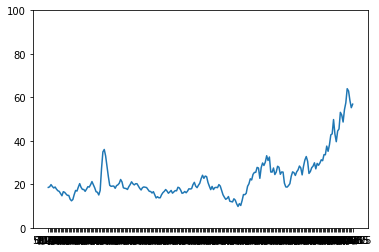

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv(r'C:\Users\Paul\Documents\Spring 2019 Stuff\EconBigData&Forecasting\FinalProject\Oil.csv')
plt.ylim([0,100])
plt.plot(dataset['DATE'], dataset['Brent'])

Here I plot Brent against WTI to show how correlated the two oil indexes are.

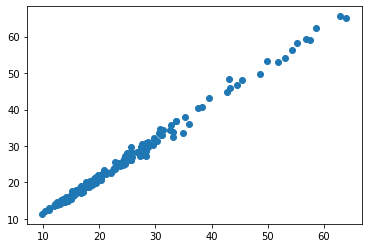

In [3]:
plt.scatter(dataset['Brent'], dataset['WTI'])

In [4]:
import numpy as np
import math
import sklearn
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


done


In [5]:
Brent = dataset['Brent']
WTI = dataset['WTI']

In [6]:
Brent = np.array(Brent)
print(Brent)
len(Brent)

[18.58 18.86 19.86 18.98 18.31 18.76 17.78 17.05 16.75 15.73 14.73 16.6
 16.31 15.54 14.91 14.89 13.18 12.41 13.02 15.31 17.17 16.89 18.7  20.32
 18.63 17.67 17.62 16.77 17.77 18.91 18.73 19.84 21.25 19.81 18.39 16.61
 16.35 15.1  17.17 27.17 34.9  36.02 33.07 28.27 23.57 19.54 19.08 19.18
 19.19 18.17 19.4  19.77 20.5  22.21 21.11 18.41 18.16 18.05 17.63 18.92
 19.89 21.16 20.24 19.74 20.27 20.26 19.21 18.14 17.39 18.47 18.79 18.67
 18.51 17.65 16.78 16.7  16.01 16.61 15.2  13.73 14.29 13.8  13.82 15.23
 16.19 16.76 17.6  16.89 15.9  16.49 17.19 15.93 16.55 17.11 17.01 18.65
 18.35 17.31 15.85 16.1  16.7  16.11 16.86 17.93 17.85 18.   19.85 20.9
 19.15 18.46 19.57 20.51 22.63 24.16 22.76 23.78 23.54 20.85 19.13 17.56
 19.02 17.58 18.46 18.6  18.46 19.87 19.17 17.18 15.19 14.07 13.1  13.53
 14.36 12.21 12.08 11.91 13.34 12.7  11.04  9.82 11.11 10.27 12.51 15.29
 15.23 15.86 19.08 20.22 22.54 22.   24.58 25.47 25.51 27.78 27.49 22.76
 27.74 29.8  28.68 30.2  33.14 30.96 32.55 25.66 25.6

224

Here I split my data into testing and training sets. Then I convert both into a window setting where 6 data points predict the next 6 data points. This is to remain consistent in the comparison between time series algorithms, however it does severely handicap the prediction accuracy (LSTMs are best for one or two step ahead forecasts with a multitude of inputs). I'm going to use an ES-LSTM next time I do time series prediction, however it won't be on this dataset. 

In [7]:
Brent = Brent.astype('float32')



#scaler = MinMaxScaler(feature_range=(-1, 1))
#Brent = scaler.fit_transform(Brent)
# split into train and test sets
train_size = int(210)
test_size = len(Brent) - train_size
train = Brent[145:train_size]
test = Brent[train_size:len(dataset)] 
print(len(train), len(test))
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=3):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)

65 14


In [8]:
# reshape into X=t and Y=t+1
look_back = 6
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [9]:
def rolling_window(a, window):
    shape = a.shape[:-1] + (a.shape[-1] - window + 1, window)
    strides = a.strides + (a.strides[-1],)
    return np.lib.stride_tricks.as_strided(a, shape=shape, strides=strides)

In [10]:
x = rolling_window(trainY, look_back)

In [11]:
len(x)

53

In [12]:
trainX = trainX[0:len(x)]
len(trainX)

53

In [13]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
trainX.shape[1]

1

In [14]:
model = Sequential()
model.add(LSTM(6, recurrent_activation='linear', input_shape=(1, look_back)))
model.add(Dense(look_back))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, x, epochs=250, batch_size=1, verbose=2)








Epoch 1/250





 - 7s - loss: 576.9526
Epoch 2/250
 - 0s - loss: 300.2952
Epoch 3/250
 - 1s - loss: 173.4996
Epoch 4/250
 - 0s - loss: 97.6156
Epoch 5/250
 - 0s - loss: 59.9674
Epoch 6/250
 - 0s - loss: 40.8277
Epoch 7/250
 - 0s - loss: 31.5141
Epoch 8/250
 - 0s - loss: 27.1675
Epoch 9/250
 - 0s - loss: 24.7812
Epoch 10/250
 - 0s - loss: 23.5708
Epoch 11/250
 - 0s - loss: 23.4952
Epoch 12/250
 - 0s - loss: 21.7444
Epoch 13/250
 - 0s - loss: 21.3425
Epoch 14/250
 - 0s - loss: 21.0646
Epoch 15/250
 - 0s - loss: 21.0929
Epoch 16/250
 - 0s - loss: 20.9776
Epoch 17/250
 - 0s - loss: 20.3238
Epoch 18/250
 - 0s - loss: 20.2025
Epoch 19/250
 - 0s - loss: 20.0457
Epoch 20/250
 - 0s - loss: 19.7051
Epoch 21/250
 - 0s - loss: 19.6903
Epoch 22/250
 - 0s - loss: 19.5215
Epoch 23/250
 - 0s - loss: 18.8816
Epoch 24/250
 - 0s - loss: 19.4881
Epoch 25/250
 - 0s - loss: 18.5655
Epoch 26/250
 - 0s - loss: 18.7057
Epoch 27/250
 - 0s - loss: 19.0934
Epoch 28/250
 - 0s - loss: 18.3163
Epoch 29/250
 

In [15]:
testPredict = model.predict(testX)

In [16]:
testPredict

array([[49.395065, 46.963654, 47.99479 , 48.61837 , 48.87226 , 50.55484 ],
       [50.58197 , 52.186924, 50.491722, 48.48106 , 50.971657, 52.326256],
       [53.665154, 53.53684 , 53.657364, 53.711975, 54.67553 , 55.6172  ],
       [53.6062  , 54.26315 , 54.262478, 54.371292, 54.91997 , 56.830875],
       [57.299225, 55.352604, 56.92353 , 59.43711 , 57.152596, 59.35081 ],
       [60.518642, 58.16541 , 58.94422 , 59.354553, 59.84043 , 61.75739 ],
       [61.25455 , 62.861008, 61.224148, 58.615906, 62.283447, 63.99838 ]],
      dtype=float32)

In [17]:
testY

array([48.65, 54.35, 57.52, 63.98, 62.91, 58.54, 55.24], dtype=float32)

In [18]:
for i in range(len(testY)-5):
    a = testPredict[i]
    m = a- testY[i:len(testY)-1+i]
    print(m)
    print(np.mean(m))
    k = math.sqrt(mean_squared_error(a, testY[i:len(testY)-1+i]))
    print(k)
    print(i)


[  0.7450638  -7.386345   -9.525211  -15.3616295 -14.037739   -7.985161 ]
-8.92517
10.349262716229173
0
[ -3.7680283  -5.3330765 -13.488277  -14.42894    -7.568344   -2.9137459]
-7.916735
9.115347996198327
1


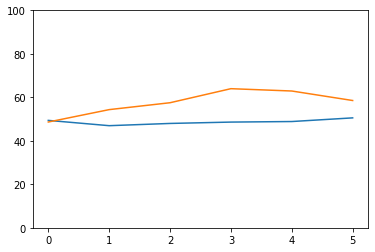

In [19]:
plt.ylim([0,100])
plt.plot(testPredict[0])
plt.plot(testY[0:6])

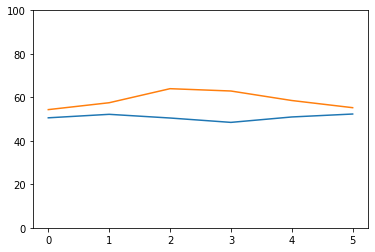

In [21]:
plt.ylim([0,100])
plt.plot(testPredict[1])
plt.plot(testY[1:7])

# Everything below this is experimental & is technically gibberish at this point! I'm going to revisit this later when I try to make a cointegrated deep learning attempt.

In [130]:
WTI = np.array(WTI)
WTI = WTI.astype('float32')



#scaler = MinMaxScaler(feature_range=(-1, 1))
#WTI = scaler.fit_transform(WTI)
# split into train and test sets
train_size = int(210)
test_size = len(WTI) - train_size
train = WTI[145:train_size]
test = WTI[train_size:len(dataset)] 
print(len(train), len(test))
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=3):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)

65 14


In [131]:
look_back = 1
WTItrainX, WTItrainY = create_dataset(train, look_back)
WTItestX, WTItestY = create_dataset(test, look_back)
WTItrainX = WTItrainX.T

In [134]:
#WTItrainX = np.column_stack((WTItrainX, trainX))
#WTItrainY = np.column_stack((WTItrainY, trainY))
#WTItestX = np.column_stack((WTItestX, testX))
#WTItestY = np.column_stack((WTItestY, testY))
#WTItrainX
#WTItrainX = np.reshape(WTItrainX, (WTItrainX.shape[0], 1, WTItrainX.shape[1]))
#WTItestX = np.reshape(WTItestX, (WTItestX.shape[0], 1, WTItestX.shape[1]))
#WTItrainX.shape[1]

In [162]:
#model = Sequential()
#model.add(LSTM(6, recurrent_activation='linear', input_shape=(1, look_back)))
#model.add(Dense(look_back))
#model.compile(loss='mean_squared_error', optimizer='adam')
#model.fit(WTItrainX, WTItrainY, epochs=100, batch_size=1, verbose=2)

In [163]:
#trainPredict = np.reshape(trainPredict, (trainPredict.shape[0], 1, trainPredict.shape[1]))
#from keras.preprocessing.sequence import TimeseriesGenerator
#gen = TimeseriesGenerator(trainY, trainY, length = 3)
#for i in range(len(gen)):
#    if i==0:
#        x = gen[i]
#    if i==1:
#        y = gen[i]
#    print(x)
#m = numpy.concatenate((x, y))
#print(len(x[0]), len(y[0]))
